# Best Location for New Well Machine Learning

You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:
* Collect the oil well parameters in the selected region: oil quality and volume of reserves;
* Build a model for predicting the volume of reserves in the new wells;
* Pick the oil wells with the highest estimated values;
* Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Open-the-data-file-and-study-the-general-information" data-toc-modified-id="Open-the-data-file-and-study-the-general-information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Open the data file and study the general information</a></span></li><li><span><a href="#Train-and-test-the-model-for-each-region" data-toc-modified-id="Train-and-test-the-model-for-each-region-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train and test the model for each region</a></span></li><li><span><a href="#Profit-calculation" data-toc-modified-id="Profit-calculation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Profit calculation</a></span></li><li><span><a href="#Write-a-function-to-calculate-profit-from-a-set-of-selected-oil-wells-and-model-predictions" data-toc-modified-id="Write-a-function-to-calculate-profit-from-a-set-of-selected-oil-wells-and-model-predictions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Write a function to calculate profit from a set of selected oil wells and model predictions</a></span></li><li><span><a href="#Calculate-risks-and-profit-for-each-region" data-toc-modified-id="Calculate-risks-and-profit-for-each-region-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculate risks and profit for each region</a></span></li><li><span><a href="#Overall-Conclusion" data-toc-modified-id="Overall-Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Overall Conclusion</a></span></li></ul></div>

In [1]:
# import pandas
import pandas as pd
# import numpy
import numpy as np
# import matplot
import matplotlib.pyplot as plt
import seaborn as sns
# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# metrics
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Open the data file and study the general information

**Open the data**

In [2]:
try: 
    df0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    df1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    df2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
except:
    print('Somethong went wrong.')
else:
    print("Read the data successfully. ")

Read the data successfully. 


**check the first 5 rows of dataframes**

In [3]:
display(df0.head())
display(df1.head())
display(df2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


**check the last 5 rows of dataframes**

In [4]:
display(df0.tail())
display(df1.tail())
display(df2.tail())

,id,f0,f1,f2,product
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764
99999,1CWhH,1.764754,-0.266417,5.722849,149.633246


,id,f0,f1,f2,product
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364
99999,relB0,-3.426139,-7.794274,-0.003299,3.179103


,id,f0,f1,f2,product
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253
99999,V9kWn,-2.551421,-2.025625,6.090891,102.775767


**Display the information of dataframes**

In [5]:
display(df0.info())
display(df1.info())
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

**Check the statistics of dataframes**

In [6]:
display(df0.describe())
display(df1.describe())
display(df2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


**Check the number of columns and rows of dataframes**

In [7]:
display(df0.shape)
display(df1.shape)
display(df2.shape)

(100000, 5)

(100000, 5)

(100000, 5)

There are 100,000 rows and 5 columns in each dataset.

**Check for the missing values**

In [8]:
display(df0.isnull().sum())
display(df1.isnull().sum())
display(df2.isnull().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

We don't have any missing values in our datasets.

**Check for duplicates**

In [9]:
display(df0.duplicated().sum())
display(df1.duplicated().sum())
display(df2.duplicated().sum())

0

0

0

We don't have any duplicate values. 

**Check for corrrelations**

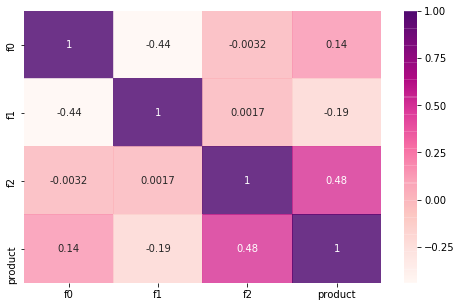

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df0.corr(), cmap = 'RdPu', alpha = 0.8, annot = True);

In df0, f2 has positive correlation with the product,  with correlation coefficient = 0.48. 

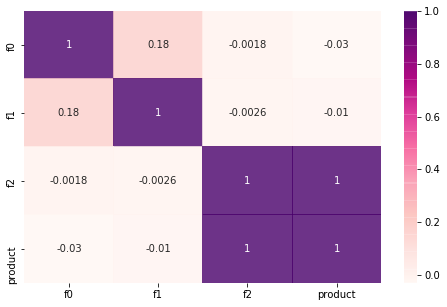

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(df1.corr(), cmap = 'RdPu', alpha = 0.8, annot = True);

In df1, f2 has strong positive correlation with the product with correlation coefficient = 1. 

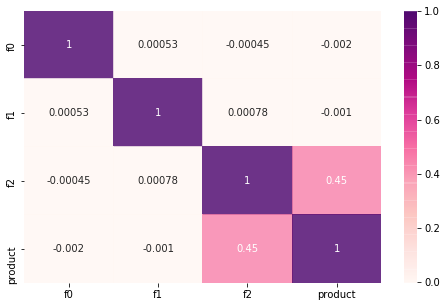

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(df2.corr(), cmap = 'RdPu', alpha = 0.8, annot = True);

In df2, f2 has positive correlation with the product with correlation coefficient = 0.45.

**Conclusion**

* There are 100,000 rows and 5 columns in each dataset.
* We don't have any missing nor duplicate values. 
* In all the dataset, f2 has positive correlation with the product. 

## Train and test the model for each region

**Train and test the model for each region**

**Region 1**

In [13]:
X0 = df0.drop(['id', 'product'], axis= 1)
y0 = df0['product']
X_train0, X_valid0, y_train0, y_valid0 = train_test_split(X0, y0 ,test_size = 0.25, random_state = np.random.RandomState(12345))

model0 = LinearRegression()
model0.fit(X_train0, y_train0) 
pred0 = pd.Series(model0.predict(X_valid0), index = y_valid0.index)

In [14]:
print("RMSE: %.4f" % np.sqrt(mean_squared_error(y_valid0, pred0)))
print('Score: %.4f' % model0.score(X_train0, y_train0))
print('Average volume of reserves: %.2f' % y_valid0.mean())
print('The average volume of predicted reserves is: %.2f' % pred0.mean())

RMSE: 37.5794
Score: 0.2742
Average volume of reserves: 92.08
The average volume of predicted reserves is: 92.59


**Region 2**

In [15]:
X1 = df1.drop(['id', 'product'], axis= 1)
y1 = df1['product']
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X1, y1 ,test_size = 0.25, random_state = np.random.RandomState(12345))

model1 = LinearRegression()
model1.fit(X_train1, y_train1) 
pred1 = pd.Series(model1.predict(X_valid1), index = y_valid1.index)

In [16]:
print("RMSE: %.4f" % np.sqrt(mean_squared_error(y_valid1, pred1)))
print('Score: %.4f' % model1.score(X_train1, y_train1))
print('Average volume of reserves: %.2f' % y_valid1.mean())
print('The average volume of predicted reserves is: %.2f' % pred1.mean())

RMSE: 0.8931
Score: 0.9996
Average volume of reserves: 68.72
The average volume of predicted reserves is: 68.73


**Region 3**

In [17]:
X2 = df2.drop(['id', 'product'], axis= 1)
y2 = df2['product']
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y2 ,test_size = 0.25, random_state = np.random.RandomState(12345))

model2 = LinearRegression()
model2.fit(X_train2, y_train2) 
pred2 = pd.Series(model2.predict(X_valid2), index = y_valid2.index)

In [18]:
print("RMSE: %.4f" % np.sqrt(mean_squared_error(y_valid2, pred2)))
print('Score: %.4f' % model2.score(X_train2, y_train2))
print('Average volume of reserves: %.2f' % y_valid2.mean())
print('The average volume of predicted reserves is: %.2f' % pred2.mean())

RMSE: 40.0297
Score: 0.1966
Average volume of reserves: 94.88
The average volume of predicted reserves is: 94.97


**Conclusion**
* The average volumn of reserves and predicted reserves are quite similar. 
* The accuracy score and RMSE indicate the model for region 1 and region 3 have poor result, we should not use them to select a well in the region.
* Overall, the model for region 2 is a perfect predictor of the reserve in this region. 

## Profit calculation

**Store all key values for calculations in separate variables**

In [19]:
budget = 100000000 #100 million USD
total_points = 500
best_points = 200
one_barrel_revenue = 4.5
one_product_revenue = 4500

**Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.**

In [20]:
one_well_price = budget / best_points
print('Price for one well is $%.2f'% one_well_price)
vol_reserves = one_well_price / one_product_revenue
print('The volume of reserves sufficient for developing a new well without losses is %.2f' % vol_reserves)

Price for one well is $500000.00
The volume of reserves sufficient for developing a new well without losses is 111.11


## Write a function to calculate profit from a set of selected oil wells and model predictions

In [21]:
def profit(target, predictions, count):
    pred_sorted = pd.Series(predictions).reset_index(drop = True).sort_values(ascending = False)
    selected = target.reset_index(drop = True).iloc[pred_sorted.index][:count]
    vol_product = selected.sum()
    revenue = vol_product * one_product_revenue
    cost = count * one_well_price
    return revenue - cost

In [22]:
print('Profit for Region 1 is $%.2f' % profit(y_valid0, pred0, 200))
print('Profit for Region 2 is $%.2f' % profit(y_valid1, pred1, 200))
print('Profit for Region 3 is $%.2f' % profit(y_valid2, pred2, 200))

Profit for Region 1 is $33208260.43
Profit for Region 2 is $24150866.97
Profit for Region 3 is $27103499.64


**Conclusion**
* The volumn of reserves sufficient for developing a new well without loses is 111 barries.
* Region 1 has the highest profit with 33million USD, if we are lucky to get top 200 wells overall in our sample of 500. 

## Calculate risks and profit for each region

**Use the bootstrapping technique with 1000 samples to find the distribution of profit.**

**Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.**

**Provide findings: suggest a region for development of oil wells and justify the choice.**

In [23]:
state = np.random.RandomState(12345)
def bootstrap_profit(target_boot, prediction_boot):
    profits = []
    for i in range(1000):
        target_subsample = target_boot.sample(n = 500, replace = True, random_state = state)
        pred_subsample = prediction_boot[target_subsample.index]
        profits.append(profit(target_subsample, pred_subsample, 200))
    profits = pd.Series(profits)
    
    avg = profits.mean().round(2)
    lower = profits.quantile(0.025).round(2)
    upper = profits.quantile(0.975).round(2)
    CI = (lower, upper)
    risks = (profits < 0).sum() / len(profits)

    print("Average profit is", avg)
    print("25% Quantile is", lower)
    print('95% Confidence Interval is', CI)
    print("Risk is {:.2%}".format( risks))
    
    return avg, lower, CI, risks

**Region 1**

In [24]:
avg, lower, CI, risks = bootstrap_profit(y_valid0, pred0)

Average profit is 3961649.85
25% Quantile is -1112155.46
95% Confidence Interval is (-1112155.46, 9097669.42)
Risk is 6.90%


**Region 2**

In [25]:
avg, lower, CI, risks = bootstrap_profit(y_valid1, pred1)

Average profit is 4611558.17
25% Quantile is 780508.11
95% Confidence Interval is (780508.11, 8629520.6)
Risk is 0.70%


**Region 3**

In [26]:
avg, lower, CI, risks = bootstrap_profit(y_valid2, pred2)

Average profit is 3929504.75
25% Quantile is -1122276.25
95% Confidence Interval is (-1122276.25, 9345629.15)
Risk is 6.50%


**Conclusion**
* From the Bootstrap analysis, the region with highest profit is Region 2, with an average profit 4.6million USD. 
* The regions with the risk of losses lower than 2.5% is Region 2, which has 0.7% risk. 

## Overall Conclusion


* We have three datasets
    * There are 100,000 rows and 5 columns in each dataset.
    * We don't have any missing nor duplicate values.
    * In all the dataset, f2 has positive correlation with the product.
* After train and test the model for each region
    * The average volumn of reserves and predicted reserves are quite similar.
    * The accuracy score and RMSE indicate the model for Region 1 and Region 3 have poor result, we should not use them to select a well in the region.
    * Overall, the model for Region 2 is a perfect predictor of the reserve in this region.
* We calculated profit from a set of selected oil wells and model predictions
    * Price for one well is $500000.0
    * The volumn of reserves sufficient for developing a new well without loses is 111 barries.
    * Region 1 has the highest profit with 33million USD.
* We calculated risks and profit for each region and used Use the bootstrapping technique with 1000 samples to find the distribution of profit.
    *  The region with highest profit is Region 2, with an average profit 4.6million USD.
    * The regions with the risk of losses lower than 2.5% is Region 2, which has 0.7% risk.